# Analiza podatkov

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)
%matplotlib inline
IGRE = pd.read_csv('igre.csv')
zanri = pd.read_csv('zanri_iger.csv')
razvijalci = pd.read_csv('razvijalci_iger.csv')
zalozniki = pd.read_csv('zalozniki_iger.csv')


In [153]:
IGRE = IGRE.drop_duplicates()
IGRE

,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis
0,Halo: Combat Evolved,1,4.2,2003,Windows,1.0,"In Halo's twenty-sixth century setting, the pl..."
1,Halo 2,6,4.4,2007,Windows,1.0,Halo 2 is the sequel to the highly successful ...
2,Army of Two,8,3.5,2008,Microsoft Xbox 360,4.0,"Focusing on cooperative strategies, Army of Tw..."
3,BioShock,10,4.5,2007,Windows,1.0,BioShock is a shooter unlike any you've ever p...
4,Dead Space (2008),11,4.4,2008,Windows,1.0,"You are Isaac Clarke, an engineer on the space..."
...,...,...,...,...,...,...,...
1995,Shin Megami Tensei: Persona 4,124791,5.0,2014,Sony Playstation 3,1.0,A rumor is going around school that by looking...
1996,The Long Reach,124822,2.5,2018,Microsoft Xbox One,1.0,The Long Reach is an adventure game filled wit...
1997,Them & Us,124847,4.3,2018,Windows,1.0,"Them & Us is a hardcore, survival horror game ..."
1998,Gun Gun Pixies,125249,5.0,2019,Windows,1.0,"In a unique spin on third-person shooter, it w..."


### Filtriranje podatkov  
Poglejmo si najprej igre, ki so izšle pred letom 2000, nato igre katere lahko igra več kot en igralec. Za tem poglejmo katere igre so tiste, ki so izšle pred letom 2000 in sprejmejo več kot enega igralca.

In [154]:
from IPython.display import display

IGRE.loc[:, 'leto'] = pd.to_numeric(IGRE['leto'], errors='coerce')     # pretvorba stolpec 'leto' v numerično vrednost
IGRE = IGRE.dropna(subset=['leto']) 
IGRE.loc[:, 'leto'] = IGRE['leto'].round().astype(int)


filter1 = IGRE["leto"] < 2000
filter2 = IGRE["maks_st_igralcev"] > 1
skupni_filter = filter1 & filter2   


display(IGRE[filter1]) 
display(IGRE[filter2])
display(IGRE[skupni_filter])


,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis
54,Metal Gear Solid,187,4.7,1998,Sony Playstation,1.0,"Metal Gear Solid follows Solid Snake, a soldie..."
55,Fallout,223,4.5,1997,MS-DOS,1.0,A devastating nuclear war had wiped out almost...
57,Forsaken 64,240,3.6,1998,Nintendo 64,4.0,"In the distant future, the advancement of scie..."
64,Resident Evil 2,378,4.2,1999,Nintendo 64,1.0,"Ready or not, the terror of Resident Evil 2 is..."
66,South Park: Chef's Luv Shack,381,3.7,1999,Nintendo 64,4.0,"Chef hosts South Park: Chef's Luv Shack, which..."
...,...,...,...,...,...,...,...
1891,Mortal Kombat Trilogy,77846,4.1,1997,MS-DOS,2.0,All the characters from the first three Mortal...
1892,Die Hard Trilogy,78021,3.6,1996,Windows,1.0,Die Hard is a third-person shooter. The player...
1929,Michael Ninn's Latex: The Game,93917,2.3,1996,Windows 3.X,1.0,Michael Ninn's Latex: The Game is a point-and-...
1935,World War II GI,100802,2.0,1999,MS-DOS,1.0,World War II GI is a first-person shooter that...


,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis
2,Army of Two,8,3.5,2008,Microsoft Xbox 360,4.0,"Focusing on cooperative strategies, Army of Tw..."
8,Left 4 Dead,19,4.0,2008,Windows,4.0,"From Valve (the creators of Counter-Strike, Ha..."
9,Gears of War,20,4.1,2007,Windows,8.0,The game focuses on the troops of Delta Squad ...
10,Gears of War 2,21,4.3,2008,Microsoft Xbox 360,10.0,"For 14 devastating years, our home, Sera, was ..."
13,Grand Theft Auto IV,26,4.3,2008,Windows,32.0,NOTE: There were two expansion packs released ...
...,...,...,...,...,...,...,...
1966,METAL GEAR SOLID V: The Definitive Experience:...,117764,4.6,2016,Windows,16.0,METAL GEAR SOLID V: THE DEFINITIVE EXPERIENCE ...
1978,Divinity: Original Sin II: Definitive Edition,118677,5.0,2019,Nintendo Switch,4.0,The battle for Divinity has begun. Choose wise...
1992,Far Cry New Dawn,124242,3.3,2019,Microsoft Xbox One,2.0,"Similar to its predecessors, Far Cry New Dawn ..."
1993,Borderlands 3,124669,4.6,2019,Microsoft Xbox One,4.0,"The original shooter-looter returns, packing b..."


,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis
57,Forsaken 64,240,3.6,1998,Nintendo 64,4.0,"In the distant future, the advancement of scie..."
66,South Park: Chef's Luv Shack,381,3.7,1999,Nintendo 64,4.0,"Chef hosts South Park: Chef's Luv Shack, which..."
67,Turok 2: Seeds of Evil,388,4.0,1998,Nintendo 64,4.0,Turok 2: Seeds of Evil is the sequel to Turok:...
68,Turok: Rage Wars,389,3.7,1999,Nintendo 64,4.0,"Since time began, Turok has maintained the bal..."
82,Lethal Enforcers I & II,538,3.2,1997,Sony Playstation,2.0,Plug in a light gun and dispense justice in LE...
...,...,...,...,...,...,...,...
1596,Requiem: Avenging Angel,16343,3.8,1999,Windows,8.0,"Requiem: Avenging Angel is a 3D, first-person ..."
1671,Master Levels for DOOM II,17604,4.3,1995,MS-DOS,4.0,Compiled by iD Software in response to various...
1673,Quake II Mission Pack: The Reckoning,17626,4.3,1998,Windows,4.0,You are part of an elite commando force that m...
1890,Maximum Force,77002,3.3,1997,Sony Playstation,2.0,"Maximum Force is the follow up to Area 51, how..."


### Igre skozi leta
Poglejmo koliko iger je izšlo v posameznem letu

In [155]:
st_iger_po_letih = (
    IGRE[IGRE['leto'] != 'No information available']
    .groupby('leto')[['ime']]
    .count()
)
st_iger_po_letih = st_iger_po_letih.rename(columns={'ime': 'st_iger_v_letu'})
display(st_iger_po_letih)

leto_z_max = st_iger_po_letih['st_iger_v_letu'].idxmax()
max_stevilo_iger = st_iger_po_letih['st_iger_v_letu'].max()


print("Leto z največjim številom iger:", leto_z_max)
print("Največje število iger:", max_stevilo_iger)

,st_iger_v_letu
leto,
1993,1
1994,23
1995,24
1996,44
1997,42
...,...
2018,24
2019,21
2020,1


Leto z največjim številom iger: 2012
Največje število iger: 198


Text(0.5, 1.0, 'Število iger v posameznem letu')

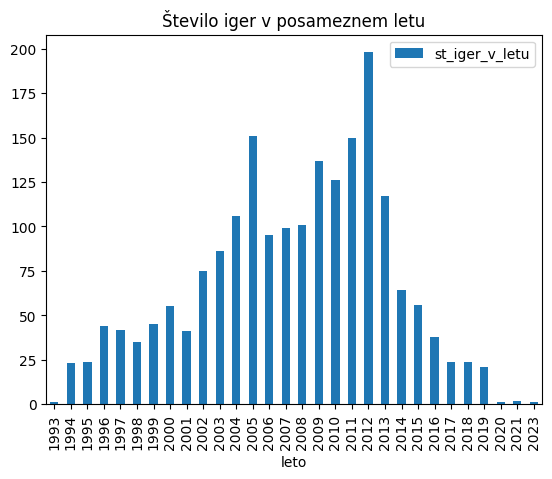

In [156]:
st_iger_po_letih.plot.bar()
plt.title('Število iger v posameznem letu')

Sedaj pa si še poglejmo kakovost iger skozi leta, s pomočjo povprečnih ocen iger v posameznem letu.

Text(0.5, 1.0, 'Povprečna ocena po letih')

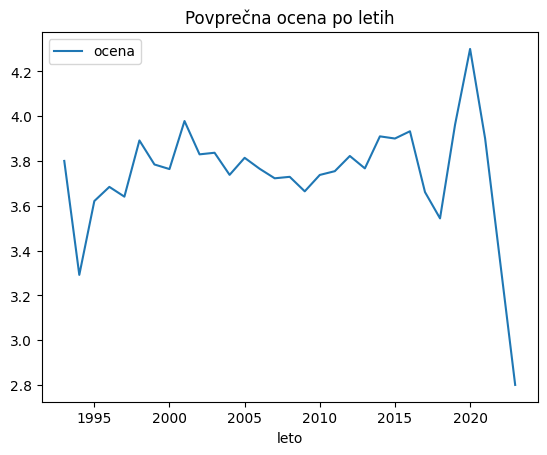

In [157]:
povprečja_po_letih = (
    IGRE[IGRE['leto'] != 'No information available']
    .groupby('leto')[['ocena']]
    .mean()
)
povprečja_po_letih.plot()
plt.title('Povprečna ocena po letih')

Vzrok za veliki padec po letu 2020 je lahko to, da je na spletni strani manj glasov za novejše igre, zato se slabe ocene hitro poznajo na rezultatu. Najkvalitetnejše igre z ESRB-jem M, so izšle leta 2020. Okoli leta 2012, ko je, kot vidimo grafu 'Število iger v posameznem letu', izhajalo največ iger z ESRB ratingom M-mature, pa igre niso ble najkvalitetnejše. Vzrok za to bi lahko bila želja po kvantiteti pred kvaliteto.

### Platforme

Število iger na posamezni platformi:

In [158]:
platforme = IGRE.groupby('platforma').count()
platforme = (
    platforme[['ime']]
    .rename(columns={'ime': 'st_iger'})
    .sort_values(by= 'st_iger', ascending=False)
)
display(platforme)

platforma_z_max = platforme['st_iger'].idxmax()
max_stevilo = platforme['st_iger'].max()


print("Platforma z največjim številom iger:", platforma_z_max)
print("Največje število iger:", max_stevilo)

,st_iger
platforma,
Windows,589
Sony Playstation 3,290
Microsoft Xbox 360,287
Sony Playstation 2,208
Microsoft Xbox,136
...,...
Sega 32X,2
Android,1
NEC TurboGrafx-CD,1


Platforma z največjim številom iger: Windows
Največje število iger: 589


### Žanri iger

In [159]:
zanri = zanri.drop_duplicates()
igre_in_zanri = pd.merge(IGRE, zanri, on="kljuc_igre")

Število iger posameznega žanra:

In [160]:
popularni_zanri = (
    igre_in_zanri
    .groupby('zanr')[['ime']]
    .count()
    .rename(columns={'ime':'st_iger'})
)
popularni_zanri = popularni_zanri.sort_values(by='st_iger', ascending=False)
popularni_zanri

,st_iger
zanr,
Shooter,885
Action,818
Adventure,513
Horror,308
Role-Playing,281
...,...
Construction and Management Simulation,3
Quiz,3
Party,2


Kot lahko opazimo, je največ strelskih iger. Prav tako so zelo popularne akcijske igre, sledijo pustolovvske igre, grozljivke, igranje vlog in ostale.

Povprečna ocena žanrov:

Text(0.5, 1.0, 'Povprečna ocena žanra')

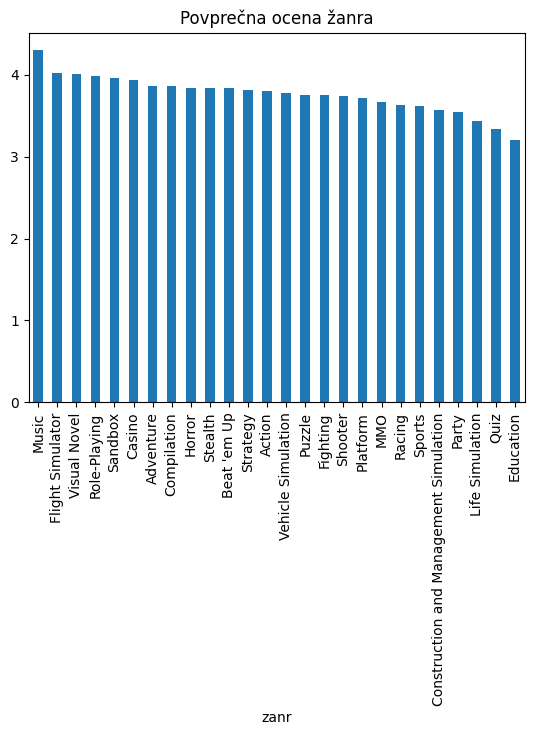

In [161]:
najbolje_ocenjeni_zanri = (
    igre_in_zanri
    .groupby('zanr')['ocena']
    .mean()
    .sort_values(ascending=False)
)
najbolje_ocenjeni_zanri.plot.bar() 
plt.title('Povprečna ocena žanra')

Ker so igre žanra 'shooter' (tj. strelske igre) najbolj popularne, poglejmo katere so to, katerega leta so izšle in na kateri platformi so

In [162]:
shooterji = igre_in_zanri[igre_in_zanri['zanr'] == 'Shooter']
shooterji = shooterji[['ime', 'kljuc_igre', 'leto', 'platforma']]
shooterji

,ime,kljuc_igre,leto,platforma
1,Halo: Combat Evolved,1,2003,Windows
3,Halo 2,6,2007,Windows
5,Army of Two,8,2008,Microsoft Xbox 360
9,BioShock,10,2007,Windows
12,Dead Space (2008),11,2008,Windows
...,...,...,...,...
3541,Ugly Americans: Apocalypsegeddon,118169,2011,Sony Playstation 3
3542,Deadfall Adventures: Heart of Atlantis,118180,2014,Sony Playstation 3
3555,Gal*Gun 2,118989,2018,Windows
3578,Borderlands 3,124669,2019,Microsoft Xbox One


Grafični prikaz koliko strelskih iger je izšlo po letih:

<Axes: xlabel='leto'>

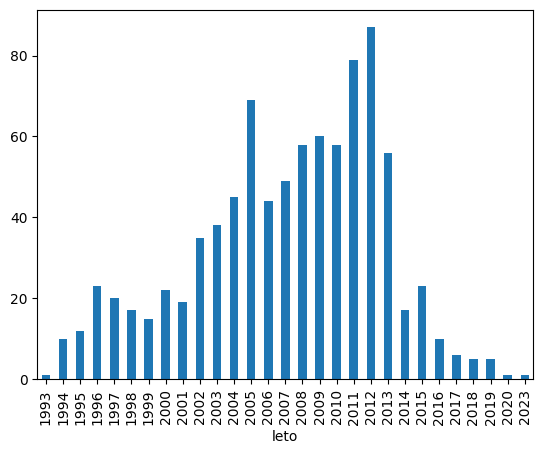

In [163]:
(shooterji
 .groupby('leto')['ime']
 .count()
 .plot.bar())

Oglejmo si kolikšen delež vseh iger posamezne platforme, predstavljajo strelske igre 

In [164]:
shooterji_platform = (
    shooterji.groupby('platforma')
    .agg(st_strelskih_iger=('ime', 'count'))
)

strelske_igre_na_platformah = pd.merge(platforme, shooterji_platform, on='platforma', how='left')
strelske_igre_na_platformah['st_strelskih_iger'] = (
    strelske_igre_na_platformah['st_strelskih_iger']
    .fillna(0)        
    .round()          
    .astype(int)      
)
strelske_igre_na_platformah['delez_strelskih_iger'] = strelske_igre_na_platformah['st_strelskih_iger'] / strelske_igre_na_platformah['st_iger']

strelske_igre_na_platformah = strelske_igre_na_platformah.sort_values(by='delez_strelskih_iger', ascending=False)

strelske_igre_na_platformah


,st_iger,st_strelskih_iger,delez_strelskih_iger
platforma,,,
Android,1,1,1.000000
Sega Saturn,18,12,0.666667
Apple iOS,3,2,0.666667
MS-DOS,33,22,0.666667
Nintendo Wii U,10,6,0.600000
...,...,...,...
Windows 3.X,4,0,0.000000
Sega Genesis,3,0,0.000000
NEC TurboGrafx-CD,1,0,0.000000


Sega Saturn, Apple iOS, MS-DOS, Nintendo Wii U imajo v kategoriji ESRB mature večinoma strelske igre. Prav tako je na windowsih več kot polovica iger z ESRB mature strelskih. Skoraj polovica jih je tudi na Sony Playstation 3. Na android platformi so vse mature igre strelske, vendar nam to ne pove veliko, saj ima le eno igro.

Text(0.5, 1.0, 'Delež strelskih iger')

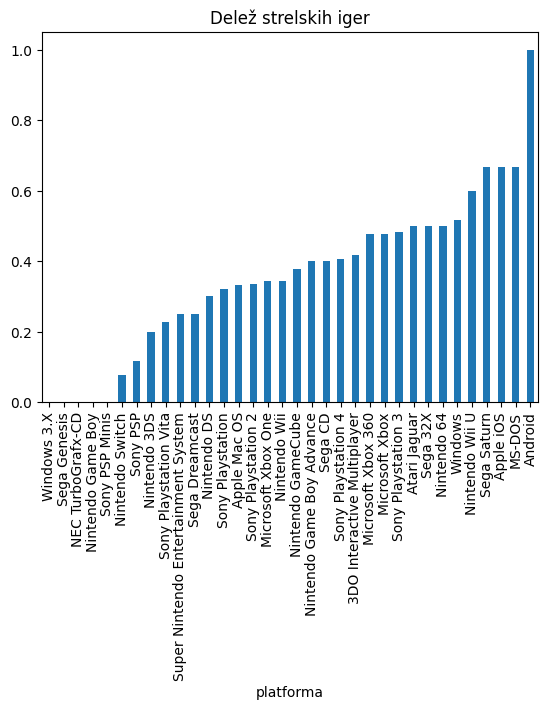

In [165]:
strelske_igre_na_platformah['delez_strelskih_iger'].sort_values().plot.bar()
plt.title('Delež strelskih iger')

Pogostost kombinacij žanrov: Oglejmo katere kombinacije žanrov se pojavijo večkrat

In [166]:
zdruzi_zanre = (
    igre_in_zanri
    .groupby('kljuc_igre')['zanr']
    .apply(lambda x: ', '.join(sorted(x.unique())))
    .reset_index()
)

zdruzi_zanre = pd.merge(zdruzi_zanre, igre_in_zanri[['kljuc_igre', 'ocena', 'ime']], on='kljuc_igre').drop_duplicates() #da se znebim identičnih vrstic saj sem zdaj to naredila v vsaki vrstici-torej za vsako igro večkrat
kolikokrat_se_pojavi_kombinacija = (
    zdruzi_zanre
    .groupby('zanr')[['kljuc_igre']]
    .count()
    .rename(columns={'kljuc_igre': 'st_kombinacij'})
    .sort_values(by='st_kombinacij', ascending=False)
)
kolikokrat_se_pojavi_kombinacija


,st_kombinacij
zanr,
Shooter,416
Action,156
"Action, Adventure",105
"Action, Shooter",102
"Horror, Shooter",79
...,...
"Racing, Sports",1
"Puzzle, Shooter",1
"Sandbox, Shooter, Vehicle Simulation",1


### Razvijalci in založniki iger

In [167]:
razvijalci = razvijalci.drop_duplicates()
razvijalci

,kljuc_igre,kljuc_razvijalca,razvijalec
0,1,6661,Bungie
1,87,6661,Bungie
2,184,6661,Bungie
3,3778,6661,Bungie
5,5803,6661,Bungie
...,...,...,...
2193,8171,66657778,SCE Studio Santa Monica
2194,11938,66657778,SCE Studio Santa Monica
2195,12909,66657778,SCE Studio Santa Monica
2196,12169,66657778,SCE Studio Santa Monica


In [168]:
igre_in_razvijalci = pd.merge(IGRE, razvijalci, on='kljuc_igre')

Poglejmo kako sta povezani ocena in število iger, ki jih naredi razvijalec. Ali lahko sklepamo mogoče, če jih je manj so bolj kvalitetne? Ali pa so razvijalci, ki izdajo več iger uspešnejši?

In [169]:
igre_in_ocene_razvijalca = (
    igre_in_razvijalci
    .groupby('kljuc_razvijalca')
    .agg(
        Razvijalec = ('razvijalec', 'first'),
        St_iger = ('ime', 'count'),
        Povprecna_ocena = ('ocena', 'mean')
    )
    .sort_values(by='St_iger', ascending=False)
)
igre_in_ocene_razvijalca

,Razvijalec,St_iger,Povprecna_ocena
kljuc_razvijalca,,,
66611,Capcom,76,3.967105
6668,Ubisoft Montreal,50,3.930000
66624,BioWare,27,4.177778
666340,Volition,27,3.744444
66646,Gearbox Software,27,3.848148
...,...,...,...
66645625,Midway Studios -- Chicago,1,3.500000
66643831,Trilobyte Games,1,3.500000
66617,Clover Studio,1,4.200000


<Axes: xlabel='St_iger', ylabel='Povprecna_ocena'>

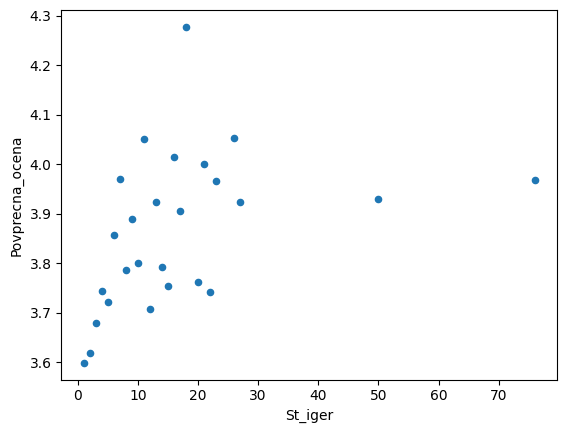

In [170]:
povprecne_ocene_r = (
    igre_in_ocene_razvijalca
    .groupby('St_iger')['Povprecna_ocena']
    .mean()
    .reset_index()
)
povprecne_ocene_r.plot.scatter(x='St_iger', y='Povprecna_ocena')

Večina točk se nahaja pri razvijalcih, ki so razvili med 1 in 20 igrami. Točke so razpršene, vendar so povprečne ocene teh razvijalcev večinoma med 3,6 in 4,2.
Obstaja nekaj izjem, kot so razvijalci z več kot 50 igrami. Te imajo povprečno oceno malo manj kot 4.
Lahko opazimo rahlo pozitivno korelacijo med številom iger in povprečno oceno. To pomeni, da razvijalci z več igrami morda dosegajo nekoliko višje povprečne ocene.
Najboljša povprečna ocena (nad 4,2) pripada razvijalcem, ki so razvili približno 20 iger.

In [171]:
zalozniki = zalozniki.drop_duplicates()
igre_in_zalozniki = pd.merge(IGRE, zalozniki, left_on='kljuc_igre', right_on = 'kljuc_igre', how='left') #saj v zaloznikih manjkajo nekateri filmi, za katere ni bilo podatkov

Poglejmo kako sta povezani ocena in število iger, ki jih izda založnik. Ali lahko sklepamo mogoče, da bolj popularni založniki izdajajo boljše igre? 

In [172]:
igre_in_ocene_zaloznika = (
    igre_in_zalozniki
    .groupby('kljuc_zaloznika')
    .agg(
        Zaloznik = ('zaloznik', 'first'),
        St_iger = ('ime', 'count'),
        Povprecna_ocena = ('ocena', 'mean')
    )
    .sort_values(by='St_iger', ascending=False)
)
igre_in_ocene_zaloznika

,Zaloznik,St_iger,Povprecna_ocena
kljuc_zaloznika,,,
5552.0,Electronic Arts,139,3.952555
55510.0,Capcom,121,3.916529
5558.0,Ubisoft,119,3.796581
55532.0,Activision,87,3.838372
55523.0,Konami,69,3.915942
...,...,...,...
55526141.0,Trilobyte Games,1,3.500000
55526725.0,Alawar,1,3.200000
55531704.0,Sony Computer Entertainment Asia,1,4.400000


<Axes: xlabel='St_iger', ylabel='Povprecna_ocena'>

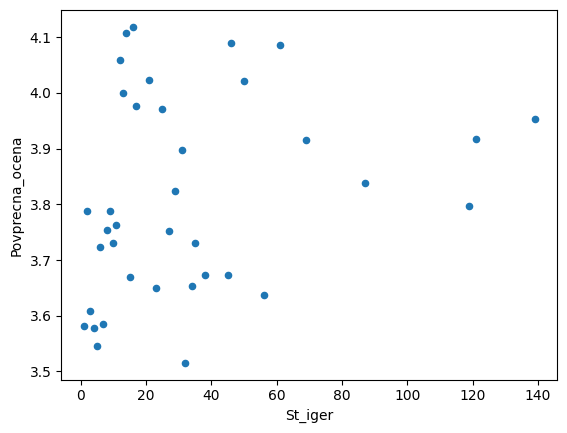

In [173]:
povprecne_ocene_z = (
    igre_in_ocene_zaloznika
    .groupby('St_iger')['Povprecna_ocena']
    .mean()
    .reset_index()
)
povprecne_ocene_z.plot.scatter(x='St_iger', y='Povprecna_ocena')

Korelacija med številom iger in povprečno oceno ni jasna. Zdi se, da pri večini založnikov večje število iger ni nujno povezano z višjimi ali nižjimi ocenami. To pomeni, da več izdanih iger ne zagotavlja boljših ali slabših ocen. Nekatere točke kažejo na rahlo izboljšanje povprečne ocene z večjim številom iger, vendar to ni splošno pravilo, saj so ocene precej razpršene. Kljub temu lahko privzamemo, da je med založniki, ki izdajo manj iger več tistih z slabo povprečno oceno, kot med založniki, ki izdajo več iger.

Poglejmo koliko založnikov in razvijalcev je pri posamezni igri

In [174]:
manjsi_igre_in_razvijalci = igre_in_razvijalci[['razvijalec','ime','kljuc_igre']]
manjsi_igre_in_zalozniki = igre_in_zalozniki[['zaloznik', 'ime','kljuc_igre']]
sodelovanje = pd.merge(manjsi_igre_in_razvijalci, manjsi_igre_in_zalozniki, on='kljuc_igre', how= 'outer')

sodelovanje[['razvijalec', 'zaloznik']] = sodelovanje[['razvijalec','zaloznik']].fillna(' ')

st_razvijalcev_in_zaloznikov_na_igro = (
    sodelovanje
    .groupby('kljuc_igre')
    .agg(
        st_razvijalcev=('razvijalec', 'nunique'),
        st_zaloznikov=('zaloznik', 'nunique')
    )
    .reset_index()
)
st_razvijalcev_in_zaloznikov_na_igro


,kljuc_igre,st_razvijalcev,st_zaloznikov
0,1,2,1
1,6,1,1
2,8,1,1
3,10,2,1
4,11,1,1
...,...,...,...
1977,124791,1,1
1978,124822,1,1
1979,124847,1,1
1980,125249,2,1


In [175]:
#dodajmo še ocene
zalozniki_in_razvijalci = pd.merge(st_razvijalcev_in_zaloznikov_na_igro, IGRE[['kljuc_igre', 'ocena']], on='kljuc_igre', how='left')
zalozniki_in_razvijalci

,kljuc_igre,st_razvijalcev,st_zaloznikov,ocena
0,1,2,1,4.2
1,6,1,1,4.4
2,8,1,1,3.5
3,10,2,1,4.5
4,11,1,1,4.4
...,...,...,...,...
1977,124791,1,1,5.0
1978,124822,1,1,2.5
1979,124847,1,1,4.3
1980,125249,2,1,5.0


Povezava med številom razvijalcev in oceno igre:

Text(0.5, 1.0, 'Povezava med številom razvijalcev in oceno igre')

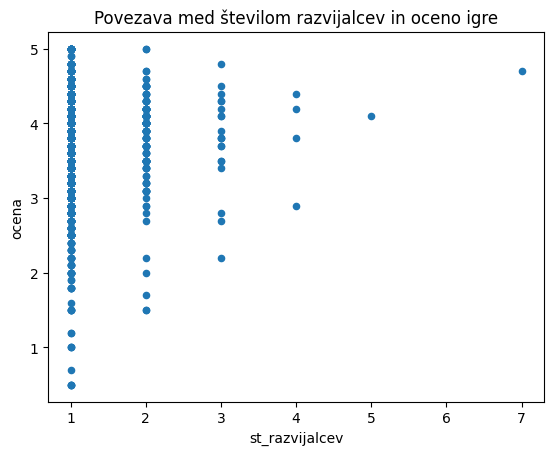

In [176]:
zalozniki_in_razvijalci.plot.scatter(x= 'st_razvijalcev', y='ocena')
plt.title('Povezava med številom razvijalcev in oceno igre')

Korelacija je šibka, vendar je opazna. Igre z večjim številom razvijalcev, v povprečju dosegajo nekoliko višje ocene. 

Text(0.5, 1.0, 'Povezava med številom zaloznikov in oceno igre')

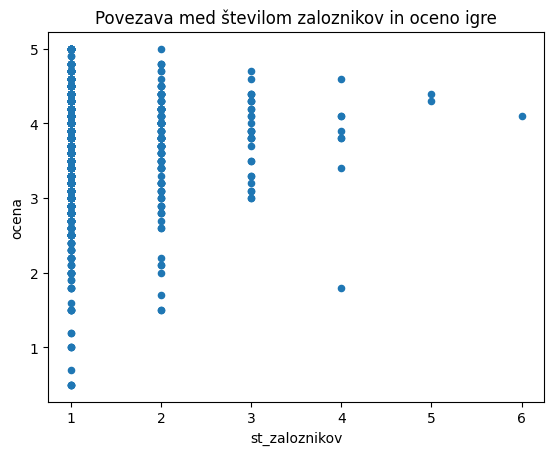

In [177]:
zalozniki_in_razvijalci.plot.scatter(x= 'st_zaloznikov', y='ocena')
plt.title('Povezava med številom zaloznikov in oceno igre')


Tukaj prav tako opazimo šibko korelacijo. Tam kjer je več založnikov, so v povprečju ocene višje.